## NLP & MultiClass Classification: Bitcoin Tweets
https://www.kaggle.com/skularat/bitcoin-tweets/data

** Dataset Information: **

- 50859 tweets accquired using the streaming tweepy python api to match for keyword 'bitcoin'

** Attribute Information:**

- tweet
- label

** Objective of this project **

- What Does Twitter Say About 'bitcoin' (positive, neutral and negative)

# Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load Data
#filepath = 'drive/app/reviews/'
df = pd.read_csv('bitcointweets.csv', header=None)#, delimiter='\t')
pd.set_option('display.max_colwidth', -1)
df = df[[1,7]]
df.columns = ['tweet','label']
df.head()

,tweet,label
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",['neutral']
1,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,['neutral']
2,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,['positive']
3,free coins https://t.co/DiuoePJdap,['positive']
4,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,['positive']


In [8]:
df.tail()

,tweet,label
50854,RT @fixy_app: Fixy Network brings popular cryptocurrencies and retailers as partners with benefits from blockchain. Partner Stores will acc…,['positive']
50855,"RT @bethereumteam: After a successful launch of our Bounty campaign, we've managed to filter out the Bounty related questions to: https://t…",['positive']
50856,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus Time is ending! https://t.co/HDvhoZrz2J, #ICO #cryptocurrency #mobile #app #mining #exercisin…",['neutral']
50857,I added a video to a @YouTube playlist https://t.co/ntFJrNvSvZ How To Bitcoin Cloud Mining Free For Lifetime Urdu / Hindi,['positive']
50858,RT @Raybambs: Airdrop PhotoCoin Airdrop Round#2. 100 #PhotoCoin will be giving to everyone who complete the google form. Your account will…,['positive']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50859 entries, 0 to 50858
Data columns (total 2 columns):
tweet    50859 non-null object
label    50859 non-null object
dtypes: object(2)
memory usage: 794.8+ KB


In [10]:
df.describe()

,tweet,label
count,50859,50859
unique,28136,3
top,RT @GymRewards: https://t.co/Bm9sIxiiwU Checkout our #bitcointalk #ANN https://t.co/J5xnJJr7Sa … #Gymrewards #tokenssale #ethereum #bitcoi…,['positive']
freq,672,22937


# Exploratory Data Analysis

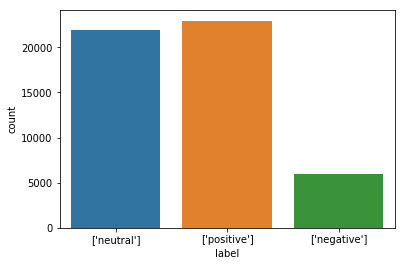

In [11]:
# inspect sentiment
sns.countplot(df['label'])

In [12]:
# text length
df['text_length'] = df['tweet'].apply(len)
df[['label','text_length','tweet']].head()

,label,text_length,tweet
0,['neutral'],140,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…"
1,['neutral'],137,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy
2,['positive'],140,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…
3,['positive'],34,free coins https://t.co/DiuoePJdap
4,['positive'],146,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…


In [13]:
df['text_length'].describe()

count    50859.000000
mean     127.650072  
std      23.595770   
min      7.000000    
25%      126.000000  
50%      140.000000  
75%      140.000000  
max      166.000000  
Name: text_length, dtype: float64

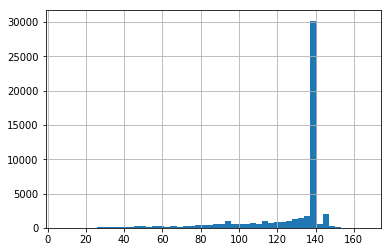

In [14]:
df['text_length'].hist(bins=50)

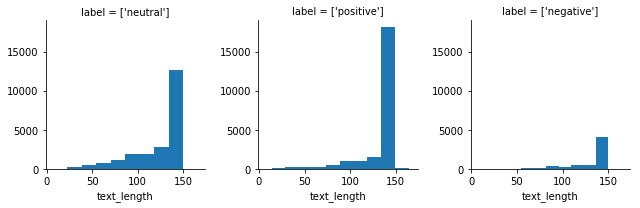

In [15]:
g = sns.FacetGrid(df,col='label')
g.map(plt.hist,'text_length')

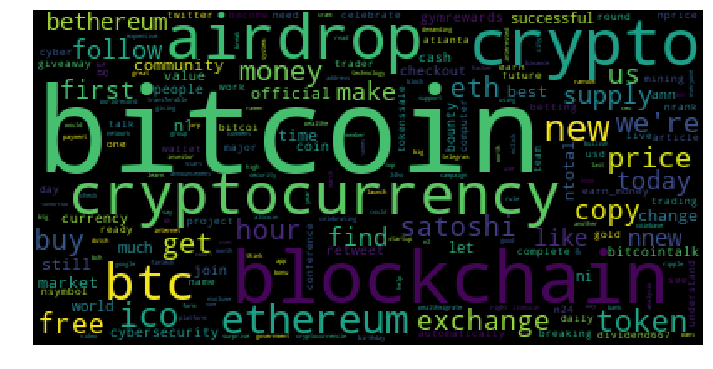

In [19]:
# word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s
df['clean_tweet'] = df['tweet'].apply(clean_text)

text = df['clean_tweet'].to_string().lower()    
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Data Preprocessing

#### Encode Categorical Variable

In [20]:
X = df['clean_tweet']
y = pd.get_dummies(df['label']).values
num_classes = df['label'].nunique()
y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ..., 
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

#### Spilt Train Test sets

In [21]:
seed = 101 # fix random seed for reproducibility
np.random.seed(seed)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40687,) (10172,) (40687, 3) (10172, 3)


#### Tokenize Text

In [27]:
from keras.preprocessing.text import Tokenizer
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [28]:
len(X_train)
#X_train[:10]
#tokenizer.word_counts
#tokenizer.word_index

40687

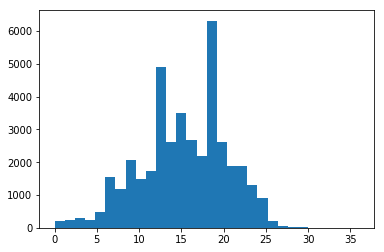

In [29]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 30)
plt.show()

In [30]:
from keras.preprocessing import sequence
max_words = 30 #max(totalNumWords)
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)
#X_train[np.argmax(totalNumWords)]

(40687, 30) (10172, 30)


# 1. dense

In [31]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding,Dropout,Conv1D,MaxPooling1D,LSTM,Bidirectional
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.callbacks import ModelCheckpoint,EarlyStopping

batch_size = 128
epochs = 25
filepath = 'weights_best_model.hdf5'

In [32]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Flatten())
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())    
    return model

In [33]:
def model_train(model):
    # callbacks
    early_stop = EarlyStopping(monitor='val_acc', patience=5, verbose=0, mode='max') 
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint, early_stop]
    # train the model
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size,
                          verbose=0, callbacks=callbacks_list)
    # plot train history
    plot_model_history(model_history)

In [34]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [35]:
def model_evaluate(): 
    # predict class with test set
    model.load_weights(filepath)
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           2000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                180060    
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 93        
Total para

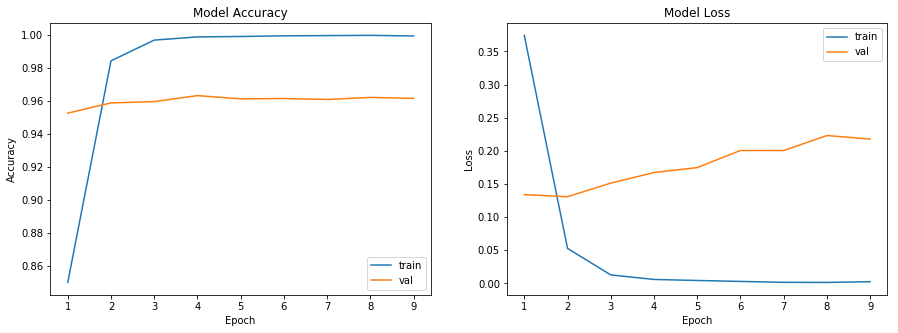

In [36]:
# train the model
max_features = 20000
embed_dim = 100
model = get_model(max_features, embed_dim)
model_train(model)

Accuracy:	96.3%


             precision    recall  f1-score   support

          0       0.95      0.89      0.92      1197
          1       0.95      0.98      0.97      4388
          2       0.98      0.97      0.97      4587

avg / total       0.96      0.96      0.96     10172



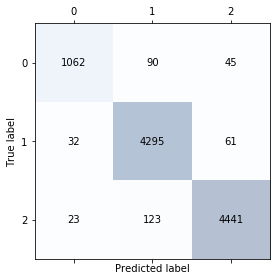

In [37]:
# evaluate model with test set
model_evaluate()

# 2. conv+dense

In [38]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           2000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 30, 32)            9632      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                6750      
__________

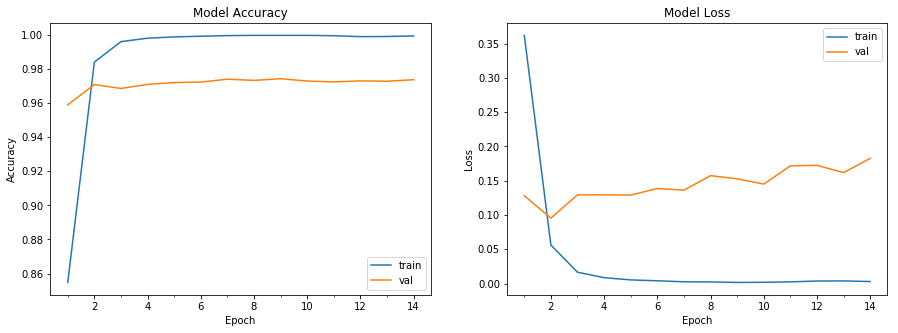

In [40]:
# train the model
max_features = 20000
embed_dim = 100
model = get_model(max_features, embed_dim)
model_train(model)

Accuracy:	97.4%


             precision    recall  f1-score   support

          0       0.95      0.92      0.94      1197
          1       0.97      0.98      0.98      4388
          2       0.99      0.98      0.98      4587

avg / total       0.97      0.97      0.97     10172



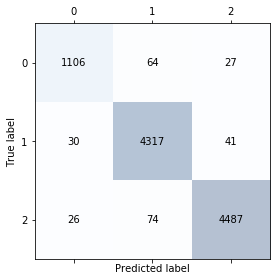

In [41]:
# evaluate model with test set
model_evaluate()

# 3. lstm

In [42]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           2000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 2,080,703
Trainable params: 2,080,703
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00001: val_acc improved from -inf to 0.96333, saving model to weights_best_model.hdf5
Epoch 00002: val_acc improved from 0.96333 to 0.97365, saving model to weights_best_model.hdf5
Epoch 00003: val_acc improved from 0.97365 to 0.97503, saving model to weights_best_model.hdf5
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc improved from 

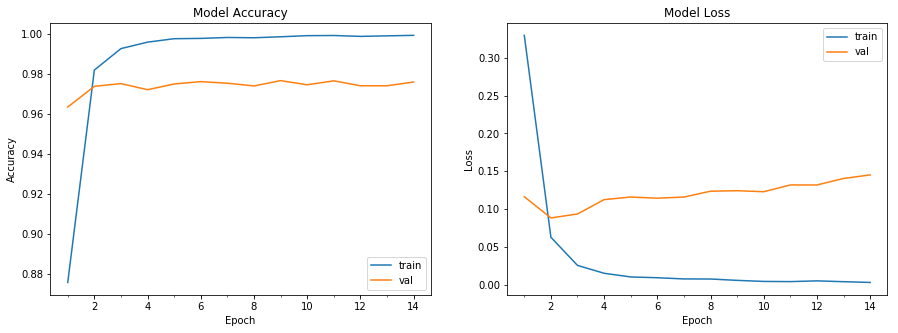

In [43]:
# train the model
max_features = 20000
embed_dim = 100
model = get_model(max_features, embed_dim)
model_train(model)

Accuracy:	97.7%


             precision    recall  f1-score   support

          0       0.96      0.93      0.95      1197
          1       0.97      0.99      0.98      4388
          2       0.99      0.98      0.98      4587

avg / total       0.98      0.98      0.98     10172



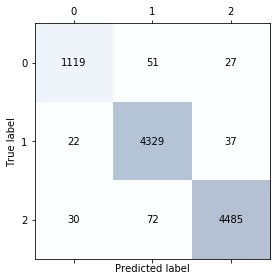

In [44]:
# evaluate model with test set
model_evaluate()

# 4. bidirectional lstm

In [45]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Bidirectional(LSTM(100)))
    model.add(Dropout(0.5, seed=seed))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           2000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603       
Total params: 2,161,403
Trainable params: 2,161,403
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00001: val_acc improved from -inf to 0.96412, saving model to weights_best_model.hdf5
Epoch 00002: val_acc improved from 0.96412 to 0.97346, saving model to weights_best_model.hdf5
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc improved from 

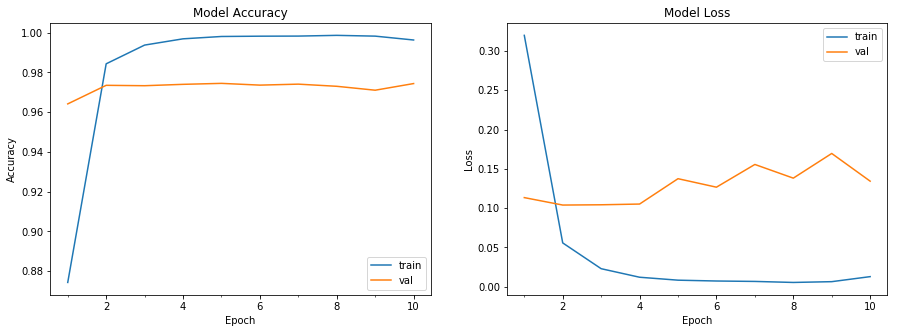

In [46]:
# train the model
max_features = 20000
embed_dim = 100
model = get_model(max_features, embed_dim)
model_train(model)

Accuracy:	97.4%


             precision    recall  f1-score   support

          0       0.97      0.92      0.94      1197
          1       0.97      0.98      0.98      4388
          2       0.98      0.98      0.98      4587

avg / total       0.97      0.97      0.97     10172



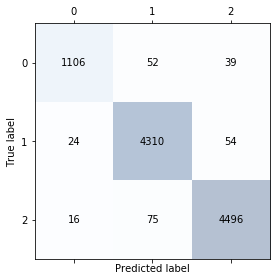

In [47]:
# evaluate model with test set
model_evaluate()

# 5. conv+lstm

In [49]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))    
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           2000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 30, 32)            9632      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total para

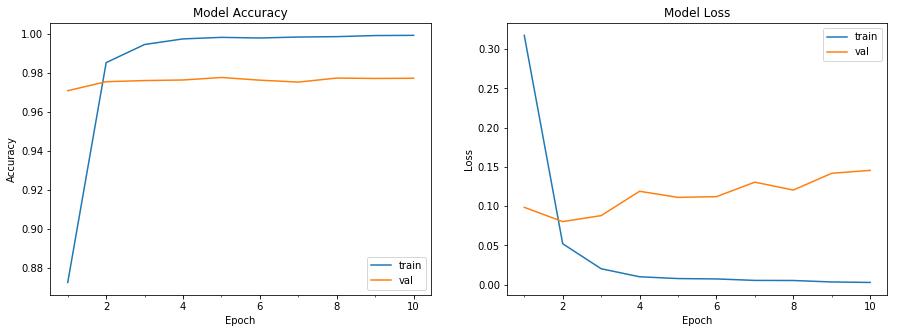

In [50]:
# train the model
max_features = 20000
embed_dim = 100
model = get_model(max_features, embed_dim)
model_train(model)

Accuracy:	97.8%


             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1197
          1       0.98      0.98      0.98      4388
          2       0.98      0.98      0.98      4587

avg / total       0.98      0.98      0.98     10172



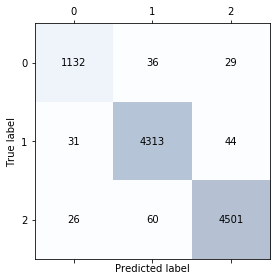

In [51]:
# evaluate model with test set
model_evaluate()

# 6. GloVe.6B.50d+conv+lstm

In [52]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
    
def get_embed_mat(EMBEDDING_FILE, max_features=20000):
    # word vectors
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))
    print('Found %s word vectors.' % len(embeddings_index))

    # embedding matrix
    word_index = tokenizer.word_index
    num_words = min(max_features, len(word_index) + 1)
    all_embs = np.stack(embeddings_index.values()) #for random init
    embedding_matrix = np.random.normal(all_embs.mean(), all_embs.std(), 
                                        (num_words, embed_dim))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    max_features = embedding_matrix.shape[0]
    
    return max_features, embedding_matrix

In [53]:
def get_model(max_features, embed_dim, embedding_matrix):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],
                       weights=[embedding_matrix]))#,trainable=False
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))    
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

Found 400000 word vectors.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 50)            1000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 30, 32)            4832      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 3)           

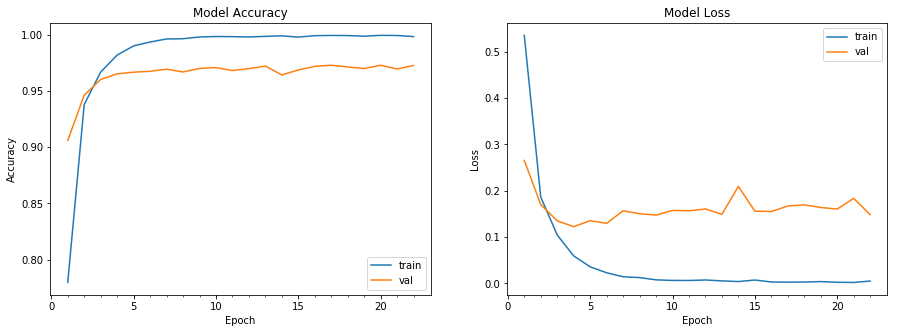

In [54]:
# embedding matrix
EMBEDDING_FILE = '../glove.6B/glove.6B.50d.txt'
embed_dim = 50 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)

# train the model
model = get_model(max_features, embed_dim, embedding_matrix)
model_train(model)

Accuracy:	97.3%


             precision    recall  f1-score   support

          0       0.96      0.91      0.94      1197
          1       0.97      0.98      0.98      4388
          2       0.98      0.98      0.98      4587

avg / total       0.97      0.97      0.97     10172



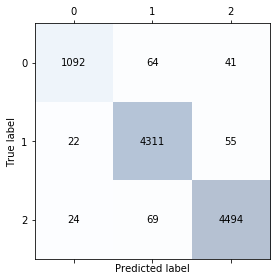

In [55]:
# evaluate model with test set
model_evaluate()

# 7. GloVe.6B.100d+conv+lstm

Found 400000 word vectors.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           2000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 30, 32)            9632      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 3)           

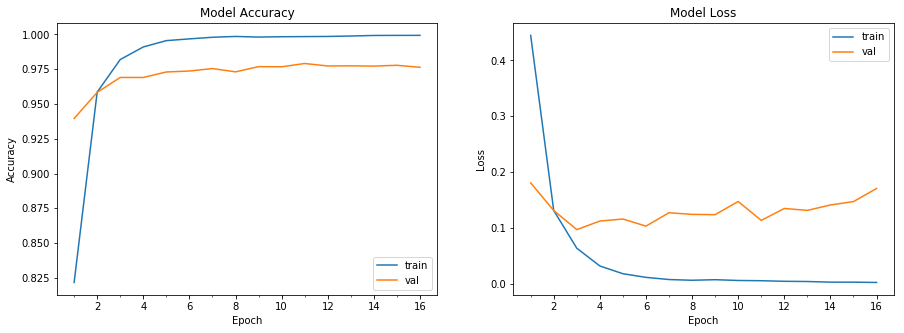

In [56]:
# embedding matrix
EMBEDDING_FILE = '../glove.6B/glove.6B.100d.txt'
embed_dim = 100 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)

# train the model
model = get_model(max_features, embed_dim, embedding_matrix)
model_train(model)

Accuracy:	97.9%


             precision    recall  f1-score   support

          0       0.96      0.94      0.95      1197
          1       0.98      0.99      0.98      4388
          2       0.99      0.98      0.98      4587

avg / total       0.98      0.98      0.98     10172



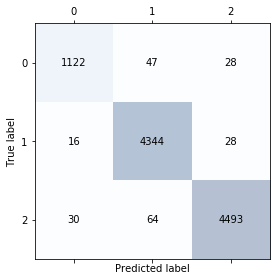

In [58]:
# evaluate model with test set
model_evaluate()